<a href="https://colab.research.google.com/github/yeonjy/deeplearning/blob/deeplearning/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝 2-2

In [ ]:
my_list = [10, 'hello list', 20]
print(my_list[1])

hello list


In [ ]:
my_list_2 = [[10,20,30],[40,50,60]]
print(my_list_2[1][1])

#2차원으로 생각, 차원 계속 늘릴 수 있음
#[[10,20,30],
# [40,50,60]]

50


In [ ]:
import numpy as np  #np는 그냥 관례
print(np.__version__)

1.19.5


In [ ]:
my_arr = np.array([[10, 20, 30], [40, 50, 60]])
print(my_arr)

[[10 20 30]
 [40 50 60]]


In [ ]:
type(my_arr)  #쥬피터, 코랩에서 코드 셀의 마지막 줄은 print() 함수를 사용 안해도 출력됨

numpy.ndarray

In [ ]:
my_arr[0][2]

30

In [ ]:
np.sum(my_arr)

210

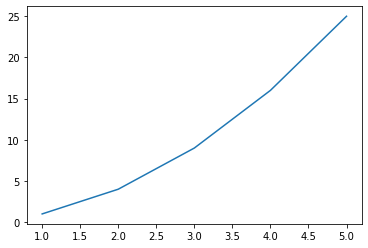

In [ ]:
import matplotlib.pyplot as plt  #plt로 하는게 관례
plt.plot([1,2,3,4,5], [1,4,9,16,25])
plt.show()  #입력 안해도 실행되기는 함

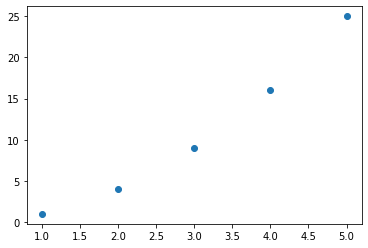

In [ ]:
plt.scatter([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])
plt.show()

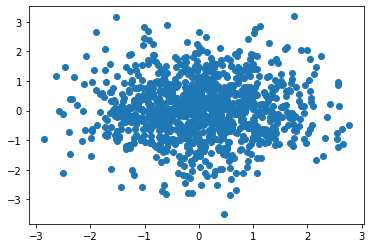

In [ ]:
x = np.random.randn(1000)  #평균 = 0, 표준편차 = 1 인 정규분포의 난수라서 0에 집중됨 = np.random.randn(1000)  #평균 = 0, 표준편차 = 1 인 정규분포의 난수라서 0에 집중됨
y = np.random.randn(1000)
plt.scatter(x, y)
plt.show()

딥러닝 3-1

In [ ]:
#당뇨병 환자 데이터당뇨병 환자 데이터
from sklearn.datasets import load_diabetes
diabetes = load_diabetes() #Bunch 클래스

print(diabetes.data.shape, diabetes.target.shape) 
# 442개 행, 10개 열(2차원), 442개 원소(1차원) 
#특성(키): 열 방향, 샘플(한 사람 정보): 행 방향

(442, 10) (442,)


In [ ]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
diabetes.target[:3]

array([151.,  75., 141.])

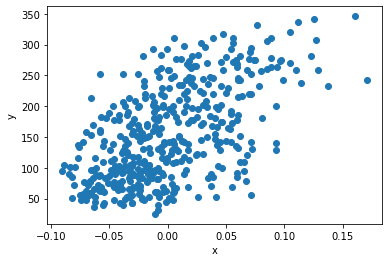

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target) # [:, 2] = [모든 행, 세번째 특성]
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x = diabetes.data[:, 2]
y = diabetes.target

딥러닝 3-2

y(예측값) = w(가중치) * x(입력) + b

In [ ]:
w = 1.0
b = 1.0
y_hat = x[0] * w + b  # x = 당뇨병의 번째 특성, x[0] = x의 첫번째 샘플
print(y_hat)

print(y[0])

1.0616962065186886
151.0


In [ ]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

print(y[0])

1.0678658271705574
151.0


w를 0.1 증가시킨건 올바른 결정이었음!

---

y_hat 늘어난 비율을 알고 싶다!

In [ ]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w) #x에 대한 식으로 계산하면 변화율은 x[0](샘플값) 자체
print(w_rate)

0.061696206518688734


따라서 변화율을 보고 w를 어떻게 바꿔야 할지 알 수 있음


In [ ]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


변화율로 절편 업데이트

In [ ]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


In [ ]:
b_new = b + 1
print(b_new)

2.0


w_new = w + w_rate 니까
b_new = b + 1

오차와 변화율을 곱하여 가중치를 업데이트

In [ ]:
err = y[0] - y_hat
w_new = w + w_rate * err  # y > y_hat: 차이 클수록 큰 양수, y < y_hat:차이 클수록 작은rr = y[0] - y_hat
w_new = w + w_rate * err  # y > y_hat: 차이 클수록 큰 양수, y < y_hat:차이 클수록 작은 음수
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


전체 샘플을 반복하여 가중치와 절편 조정

In [ ]:
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


어떤 모델인지 그래프로 알기

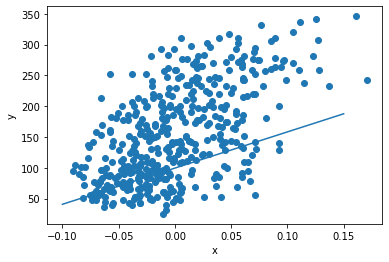

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show( )

더 정확한 모델 찾기

In [ ]:
for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat= x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


In [ ]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


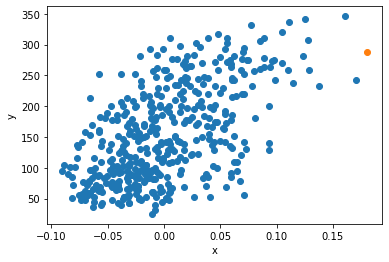

In [ ]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show( )

3장 3절

3장 4절

In [ ]:
#Neuron 클래스 만들기

class Neuron:
  def __init__(self):
    self.w = 1.0    # 가중치 초기화
    self.b = 1.0    # 절편 초기화화
    def forpass(self, x):
  y_hat = x * self.w + self.b  #직선 방정식 계산 
    return y_hat
    def backprop(self,x, err):
  w_grad = x * err
  b_grad = 1 * err
  return w_grad, b_grad

IndentationError: ignored

In [ ]:
# 정방향 계산 만들기 (예측값 계산)


In [ ]:
# 역방향 계산 만들기


In [ ]:
#fit() 메서드 구현
def fit(self, x, y, epochs=100):   
  for i in range(epochs):          # epochs만큼 반복
    for x_i, y_i in zip(x,y):      # 모든 샘플에 대해 반복
      y_hat = self.forpass(x_i)    # 정방향 계산
      err = -(y_i - y_hat)         # 오차 계산
      w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
      self.w -= w_grad             # 가중치 업데이트
      self.b -= b_grad             # 절편 업데이트

In [ ]:
# 뉴런 훈련

neuron = Neuron( )
neuron.fit(x, y)

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show

AttributeError: ignored

4장 1절~2절